In [1]:
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/era5_data/era5daily_djf_uvt.nc', 
                       parallel=True, chunks={'time': 31})

rename = {'latitude': 'lat', 'longitude': 'lon'}
ds = ds.rename(rename)

ubar = ds.u.mean(('time', 'lon')).load()
ubar

<xarray.DataArray 'u' (level: 37, lat: 181)>
array([[-5.10560349e-04,  2.12391639e+00,  4.18416548e+00, ...,
        -2.50046802e+00, -1.27563059e+00, -5.10560349e-04],
       [-5.30218298e-04,  2.06657982e+00,  4.12433195e+00, ...,
        -1.42240512e+00, -7.27110803e-01, -5.30218298e-04],
       [-5.60360611e-04,  2.05048466e+00,  4.08212471e+00, ...,
        -8.77635419e-01, -4.48120564e-01, -5.60360611e-04],
       ...,
       [-4.13580827e-04, -7.58844689e-02, -9.11371410e-02, ...,
        -1.58168912e+00, -2.91550905e-01, -4.13580827e-04],
       [-3.99164972e-04, -7.97242224e-02, -1.09006725e-01, ...,
        -1.58181369e+00, -2.91913748e-01, -3.99164972e-04],
       [-3.95233423e-04, -6.40996620e-02, -9.30650756e-02, ...,
        -1.58268082e+00, -2.91968107e-01, -3.95233423e-04]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 89.0 88.0 87.0 86.0 ... -87.0 -88.0 -89.0 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03

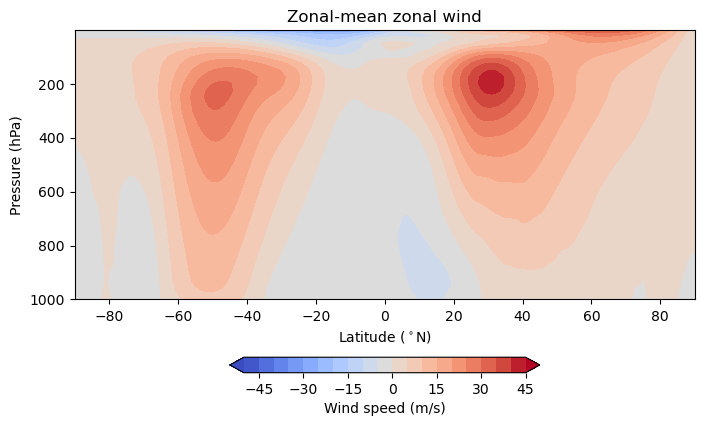

In [3]:
import sys
sys.path.append('/home/users/cturrell/documents/eddy_feedback')
import functions.eddy_feedback as ef

ef.zonal_mean_zonal_wind(ubar, yscale='linear')

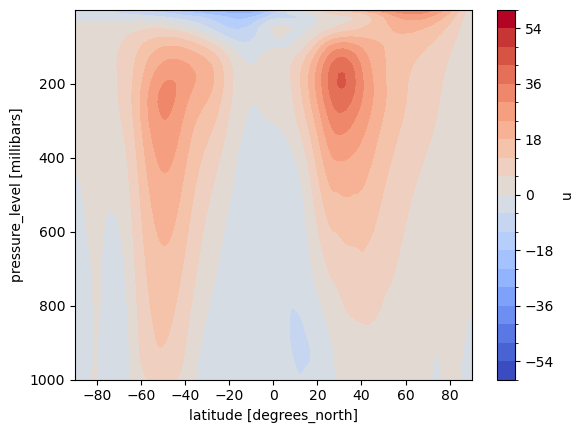

In [20]:
ubar.plot.contourf(yincrease=False, levels=21, cmap='coolwarm')

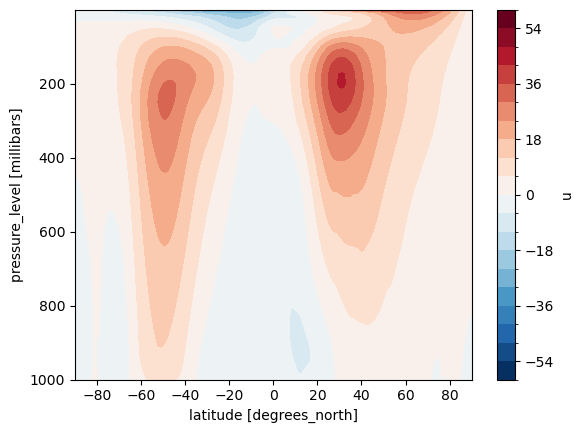

In [21]:
ubar.plot.contourf(yincrease=False, levels=21)

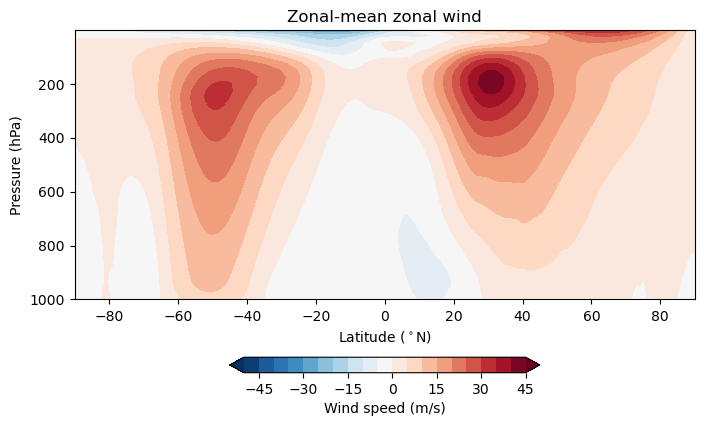

In [19]:
ef.zonal_mean_zonal_wind(ubar, yscale='linear', cmap='RdBu_r')

In [5]:
ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/era5_data/era5daily_uvt.nc', 
                       parallel=True, chunks={'time': 31})

rename = {'latitude': 'lat', 'longitude': 'lon'}
ds = ds.rename(rename)

ubar1 = ds.u.mean(('time', 'lon'))
ubar1

<xarray.DataArray 'u' (level: 37, lat: 181)>
dask.array<mean_agg-aggregate, shape=(37, 181), dtype=float32, chunksize=(37, 181), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 90.0 89.0 88.0 87.0 86.0 ... -87.0 -88.0 -89.0 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03

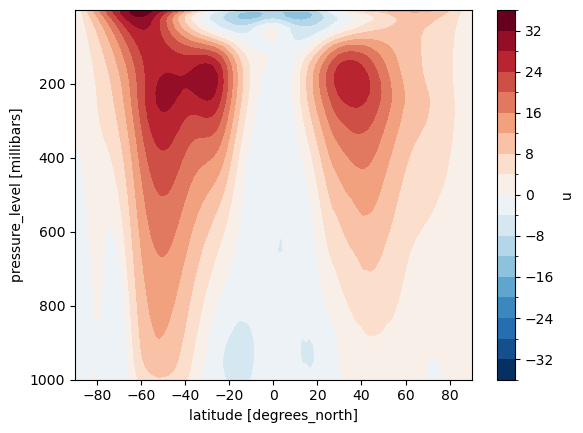

In [18]:
ubar1.plot.contourf(yincrease=False, yscale='linear', levels=21)

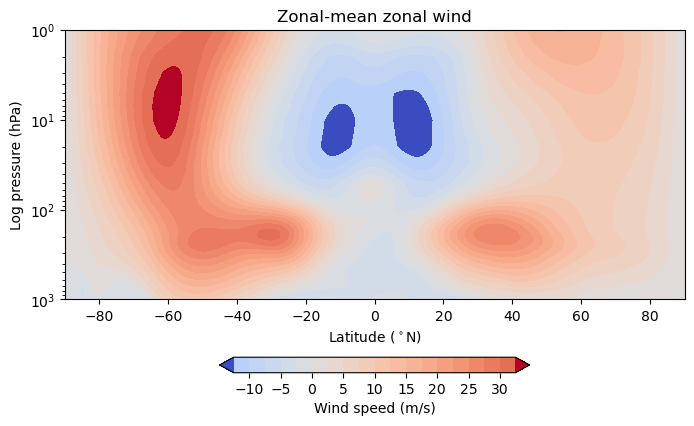

In [6]:
ef.zonal_mean_zonal_wind(ubar1, winter=False)

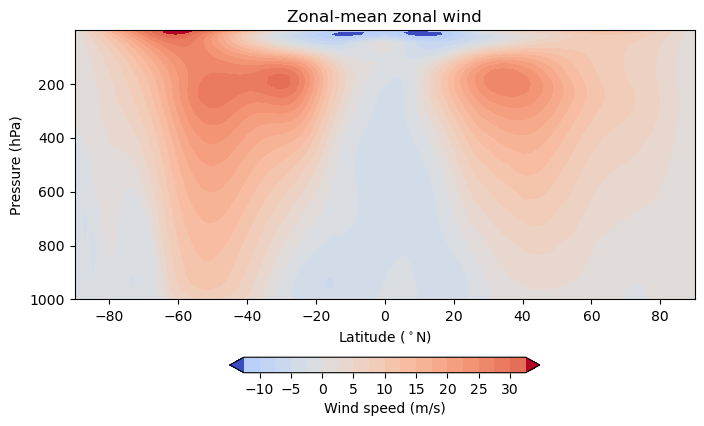

In [7]:
ef.zonal_mean_zonal_wind(ubar1, yscale='linear', winter=False)

In [8]:
def zonal_mean_zonal_wind(ubar1, cmap='sns.coolwarm', yscale='log', levels=20, yincrease=False, figsize=(8,5), winter=True):
    
    """
    Input: Xarray dataArray containing ubar
    
    Output: Countour plot showing zonal-mean zonal wind
    """
    
    # import custom colour map
    if cmap == 'sns.coolwarm':
        import seaborn as sns
        coolwarm = sns.color_palette("coolwarm", as_cmap=True)
        cmap = coolwarm
    
    # plot it
    plt.figure(figsize=figsize)
    
    if winter == True:
        plt.contourf(ubar.lat.values, ubar.level.values, ubar,
                 cmap=cmap, levels=levels, extend='both')
        plt.colorbar(location='bottom', orientation='horizontal', shrink=0.5,
             label='Wind speed (m/s)', ticks=[-45, -30, -15, 0, 15, 30, 45], extend='both')
    else:
        plt.contourf(ubar.lat.values, ubar.level.values, ubar,
                 cmap=cmap, levels=levels, extend='both', vmin=-45, vmax=45)
        plt.colorbar(location='bottom', orientation='horizontal', shrink=0.5,
             label='Wind speed (m/s)', extend='both', ticks=[-45, -30, -15, 0, 15, 30, 45])
    
    plt.yscale(yscale)
    
    if yincrease == False:
        plt.gca().invert_yaxis()
    
    plt.xlabel('Latitude ($^\\circ$N)')
    
    if yscale == 'log':
        plt.ylabel('Log pressure (hPa)')
    else:
        plt.ylabel('Pressure (hPa)')
    
    plt.title('Zonal-mean zonal wind')
    plt.show()

In [9]:
import numpy as np
lvl = np.linspace(-50, 50, 21)

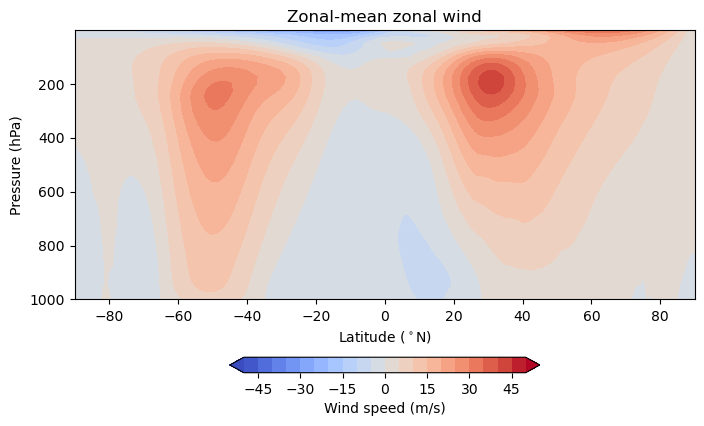

In [10]:
zonal_mean_zonal_wind(ubar1, yscale='linear', levels=lvl)

### Play with diverging colour palettes

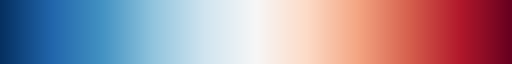

In [11]:
import seaborn as sns
redblue = sns.color_palette('RdBu_r', as_cmap=True)
redblue

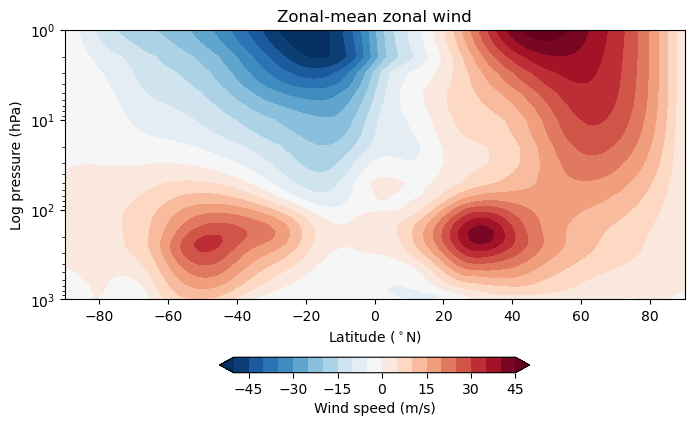

In [12]:
ef.zonal_mean_zonal_wind(ubar, cmap=redblue, levels=20)

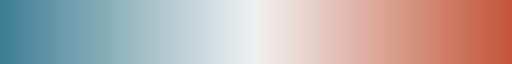

In [13]:
custom = sns.diverging_palette(220, 20, as_cmap=True)
custom

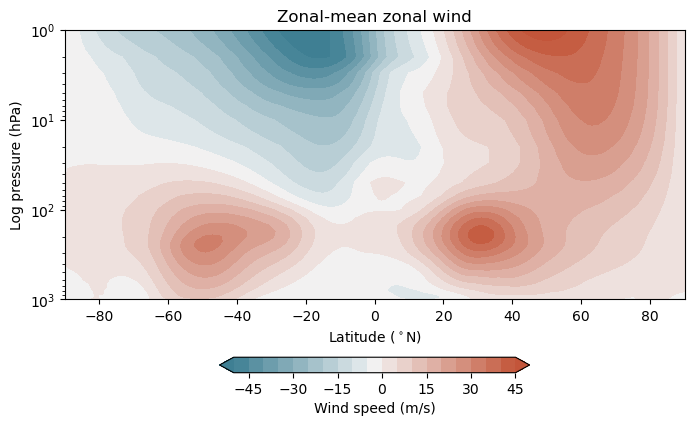

In [14]:
ef.zonal_mean_zonal_wind(ubar, cmap=custom)

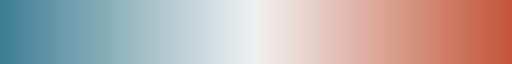

In [15]:
custom1 = sns.diverging_palette(220, 20, as_cmap=True, sep=1)
custom1

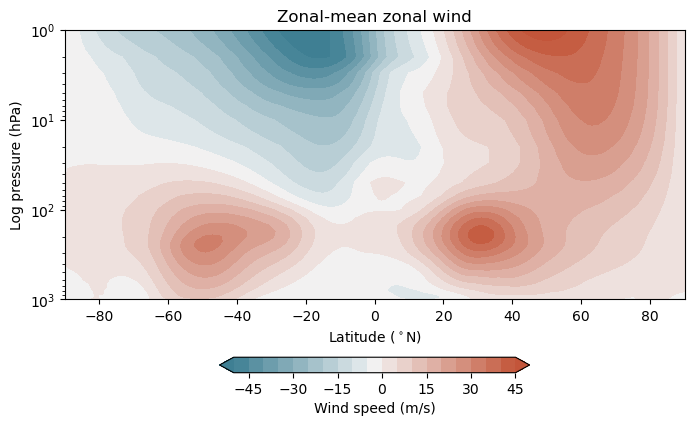

In [16]:
ef.zonal_mean_zonal_wind(ubar, cmap=custom1)